## Activity 1 - Time Series Prediction with MLP

In this activity, we will learn:<br>
* Multilayer Perceptron Regression
* Multilayer Perceptron Regression Using the Window Method


### Mount Google Drive

Mount your Google Drive on your runtime using an authorization code.

Follow the instruction on the screen to authorise Colab accessing your drive. On your Google Drive, you can access you files prepend with “/content/drive/MyDrive/”

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Problem Description: Time Series Prediction
The problem we are going to look at in this lesson is the international airline passengers prediction problem. This is a problem where given a year and a month, the task is to predict the number of international airline passengers in units of 1,000. The data ranges from January 1949 to December 1960 or 12 years, with 144 observations.

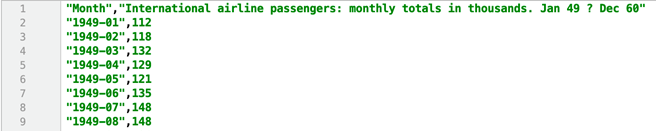


We can load this dataset easily using the Pandas library.  We are not interested in the date, given that each observation is separated by the same interval of one month. Therefore when we load the dataset we can exclude the first column. The downloaded dataset also has footer information that we can exclude with the skipfooter argument to pandas.read csv() set to 3 for the 3 footer lines.


In [ ]:
dataset_path = '/content/drive/MyDrive/Crafting/DLP/Day 2/international-airline-passengers.csv'

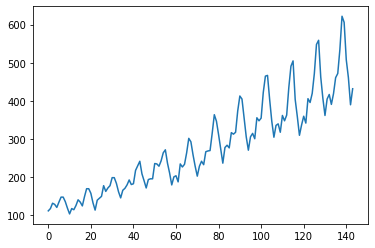

In [ ]:
from pandas import read_csv
import matplotlib.pyplot as plt
dataset = read_csv(dataset_path, 
                   usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

You can see an upward trend in the plot. You can also see some periodicity to the dataset that probably corresponds to the northern hemisphere summer holiday period.

### Multilayer Perceptron Regression

We can phrase the time series prediction problem as a regression problem. I.e. given the number of passengers (in units of thousands) this month, what is the number of passengers next month. We can write a simple function to convert our single column of data into a two-column dataset. The first column containing this month’s (t) passenger count and the second column containing next month’s (t+1) passenger count, to be predicted.

Use the following code to import the necessary functions and classes we intend to use.  Then extract the NumPy array from the dataframe and convert the integer values to floating point values which are more suitable for modelling with a neural network.

In [ ]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv(dataset_path, 
                     usecols=[1], engine='python',skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

After we model our data and estimate the skill of our model on the training dataset, we need to get an idea of the skill of the model on new unseen data. For a normal classification or regression problem we would do this using k-fold cross-validation. With time series data, the sequence of values is important. A simple method that we can use is to split the ordered dataset into train and test datasets. The code below calculates the index of the split point and separates the data into the training datasets with 67% of the observations that we can use to train our model, leaving the remaining 33% for testing the model.

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


Now we can define a function to create a new dataset as described above. The function takes two arguments, the dataset which is a NumPy array that we want to convert into a dataset and the look back which is the number of previous time steps to use as input variables to predict the next time period, in this case, defaulted to 1. This default will create a dataset where X is the number of passengers at a given time (t) and Y is the number of passengers at the next time (t+1). It can be configured and we will look at constructing a differently shaped dataset in the next section.

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)

Let’s take a look at the effect of this function on the first few rows of the dataset

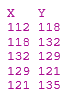

Let’s use this function to prepare the train and test datasets ready for modelling.

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX[:10] 

array([[112.],
       [118.],
       [132.],
       [129.],
       [121.],
       [135.],
       [148.],
       [148.],
       [136.],
       [119.]], dtype=float32)

In [ ]:
trainY[:10]

array([118., 132., 129., 121., 135., 148., 148., 136., 119., 104.],
      dtype=float32)

We can now fit a Multilayer Perceptron model to the training data. We use a simple network with 1 input, 1 hidden layer with 8 neurons and an output layer. The model is fit using mean squared error, if we take the square root gives us an error score in the units of the dataset. We  will try a few rough parameters as shown in the configuration below, but by no means is the network listed optimized.


In [ ]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
47/47 - 0s - loss: 10887.4980
Epoch 2/200
47/47 - 0s - loss: 4189.5371
Epoch 3/200
47/47 - 0s - loss: 1573.9376
Epoch 4/200
47/47 - 0s - loss: 741.5240
Epoch 5/200
47/47 - 0s - loss: 563.7643
Epoch 6/200
47/47 - 0s - loss: 540.9202
Epoch 7/200
47/47 - 0s - loss: 545.7318
Epoch 8/200
47/47 - 0s - loss: 545.4351
Epoch 9/200
47/47 - 0s - loss: 547.0812
Epoch 10/200
47/47 - 0s - loss: 541.0862
Epoch 11/200
47/47 - 0s - loss: 549.0184
Epoch 12/200
47/47 - 0s - loss: 546.0869
Epoch 13/200
47/47 - 0s - loss: 541.7125
Epoch 14/200
47/47 - 0s - loss: 542.5687
Epoch 15/200
47/47 - 0s - loss: 541.2982
Epoch 16/200
47/47 - 0s - loss: 546.9976
Epoch 17/200
47/47 - 0s - loss: 543.3759
Epoch 18/200
47/47 - 0s - loss: 547.3535
Epoch 19/200
47/47 - 0s - loss: 542.5345
Epoch 20/200
47/47 - 0s - loss: 544.7902
Epoch 21/200
47/47 - 0s - loss: 545.3773
Epoch 22/200
47/47 - 0s - loss: 550.6839
Epoch 23/200
47/47 - 0s - loss: 541.4742
Epoch 24/200
47/47 - 0s - loss: 547.2130
Epoch 25/200
47/47 - 

Once the model is fit, we can estimate the performance of the model on the train and test datasets. This will give us a point of comparison for new models.

In [ ]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 531.49 MSE (23.05 RMSE)
Test Score: 2354.29 MSE (48.52 RMSE)


Finally, we can generate predictions using the model for both the train and test dataset to get a visual indication of the skill of the model. Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. Once prepared, the data is plotted, showing the original dataset in blue, the predictions for the train dataset in orange, the predictions on the unseen test dataset in green.



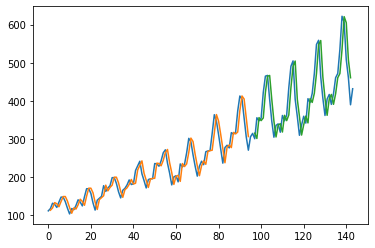

In [ ]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Number of Passengers Predicted Using a Simple Multilayer Perceptron Model. Blue=Whole Dataset, Orange=Training, Green=Predictions

### Multilayer Perceptron Regression Using the Window Method

We can also phrase the problem so that multiple recent time steps can be used to make the prediction for the next time step. This is called the **window method**, and the size of the window is a parameter that can be tuned for each problem. For example, given the current time (t) we want to predict the value at the next time in the sequence (t+1), we can use the current time (t) as well as the two prior times (t-1 and t-2). When phrased as a regression problem the input variables are t-2, t-1, t and the output variable is t+1.

![SlidingWindow.jpg](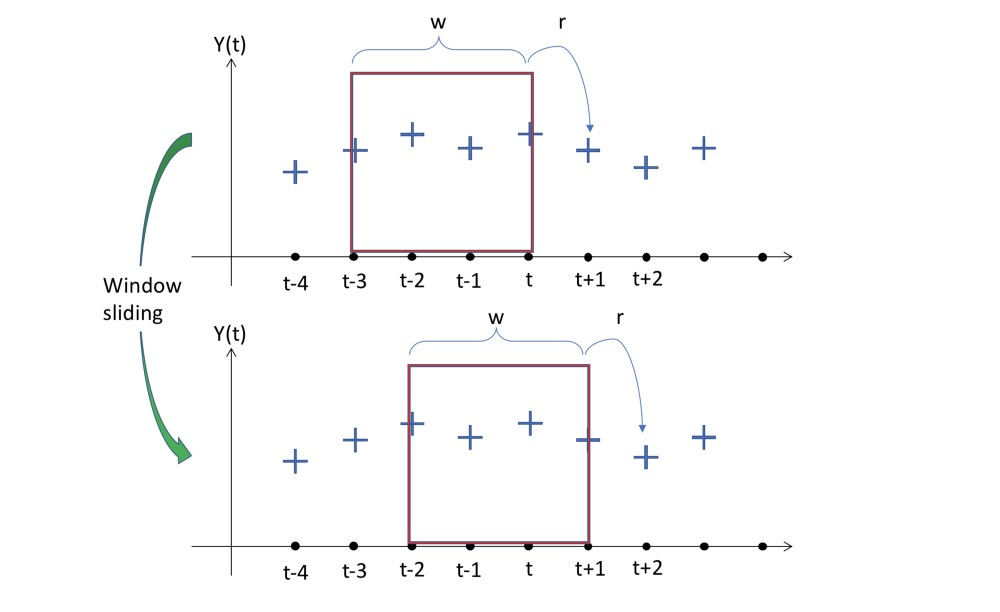 "source: https://towardsdatascience.com/ml-approaches-for-time-series-4d44722e48fe")

The **create_dataset()** function we wrote in the previous section allows us to create this formulation of the time series problem by increasing the look back argument from 1 to 3. A sample of the dataset with this formulation looks as follows:


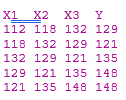

We can re-run the exercise in the previous section with the larger window size. We will increase the network capacity to handle the additional information. ***The first hidden layer is increased to 12 neurons and a second hidden layer is added with 8 neurons. The number of epochs is also increased to 400. (do this as an exercise)***

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [ ]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)

Epoch 1/400
46/46 - 0s - loss: 179446.5000
Epoch 2/400
46/46 - 0s - loss: 121074.7266
Epoch 3/400
46/46 - 0s - loss: 87565.9766
Epoch 4/400
46/46 - 0s - loss: 70428.3984
Epoch 5/400
46/46 - 0s - loss: 54954.2383
Epoch 6/400
46/46 - 0s - loss: 39440.7383
Epoch 7/400
46/46 - 0s - loss: 25850.6758
Epoch 8/400
46/46 - 0s - loss: 12948.4834
Epoch 9/400
46/46 - 0s - loss: 4868.0430
Epoch 10/400
46/46 - 0s - loss: 1842.3992
Epoch 11/400
46/46 - 0s - loss: 1233.4236
Epoch 12/400
46/46 - 0s - loss: 1134.9467
Epoch 13/400
46/46 - 0s - loss: 1135.6675
Epoch 14/400
46/46 - 0s - loss: 1112.4589
Epoch 15/400
46/46 - 0s - loss: 1097.5923
Epoch 16/400
46/46 - 0s - loss: 1084.4657
Epoch 17/400
46/46 - 0s - loss: 1107.2670
Epoch 18/400
46/46 - 0s - loss: 1076.3269
Epoch 19/400
46/46 - 0s - loss: 1082.2709
Epoch 20/400
46/46 - 0s - loss: 1088.7500
Epoch 21/400
46/46 - 0s - loss: 1073.4413
Epoch 22/400
46/46 - 0s - loss: 1031.3259
Epoch 23/400
46/46 - 0s - loss: 1015.8064
Epoch 24/400
46/46 - 0s - loss: 1

In [ ]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 540.35 MSE (23.25 RMSE)
Test Score: 2159.30 MSE (46.47 RMSE)


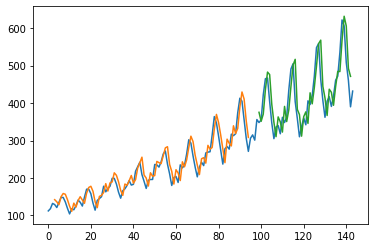

In [ ]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Prediction of the Number of Passengers using a Simple Multilayer Perceptron Model With Time Lag. Blue=Whole Dataset, Orange=Training, Green=Predictions

We can see that the error was reduced compared to that of the previous exercise. Again, the window size and the network architecture were not tuned, this is just a demonstration of how to frame a prediction problem. Taking the square root of the performance scores we can see the average error on the training dataset was 23 passengers (in thousands per month) and the average error on the unseen test set was 47 passengers (in thousands per month).